# Q3 - Employee Retention
## Cristian Garay

## Goal of the Challenge:
- Predict headcount for each company for each day.
- What are the main factors that drive employee churn?
- If you could add just one variable that could help explain employee churn, what would it be?

ideas:
- line plots showing for each company, dates, number of employees, median salary, seniority?.
- plots with changes in % of head counts, median salaries, etc.
- add variable number of days in company for each employee.
- add variable days to quit

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [49]:
employee_retention = pd.read_csv('employee_retention_data.csv', parse_dates=['join_date', 'quit_date'], \
                                 index_col='employee_id')
employee_retention.head()

,company_id,dept,seniority,salary,join_date,quit_date
employee_id,,,,,,
13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
927315.0,4,marketing,14,101000.0,2014-10-13,NaT
662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


__Columns:__
+ employee_id : id of the employee. Unique by employee per company
+ company_id : company id.
+ dept : employee dept
+ seniority : number of yrs of work experience when hired
+ salary: avg yearly salary of the employee during her tenure within the company
+ join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13
+ quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

In [50]:
employee_retention.shape

(24702, 6)

In [51]:
employee_retention.describe()

,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000
mean,3.426969,14.127803,138183.345478
std,2.700011,8.089520,76058.184573
min,1.000000,1.000000,17000.000000
25%,1.000000,7.000000,79000.000000
50%,2.000000,14.000000,123000.000000
75%,5.000000,21.000000,187000.000000
max,12.000000,99.000000,408000.000000


In [52]:
employee_retention.dtypes

company_id             int64
dept                  object
seniority              int64
salary               float64
join_date     datetime64[ns]
quit_date     datetime64[ns]
dtype: object

In [53]:
#there shouldn't be nulls on join_date.
employee_retention[employee_retention['join_date'].isnull()].shape[0]

0

In [58]:
#there shouldn't be 2 employees with the same id.
employee_retention.index.unique().shape

(24702,)

In [59]:
#number of different companies.
employee_retention['company_id'].unique().shape

(12,)

I'll create a new time series dataframe with, for each employee, for each date, how many days does they have left in the company.

I'll add all dates between join and quit.

## Data preparation

I'll create a dataframe with:
- for each employee
- for each date between join and quit
- will have how many days are left for they to leave

In [62]:
%%time
days_to_quit = []
for index, row in employee_retention.iterrows():
    join_date = row['join_date']
    quit_date = row['quit_date']
    if(quit_date is pd.NaT): quit_date = pd.to_datetime('today')
    date_range = pd.date_range(start=join_date, end=quit_date)
    company_id = row['company_id']
    dept = row['dept']
    seniority = row['seniority']
    salary = row['salary']
    days_to_quit.extend([date, company_id, index, dept, seniority, salary, (quit_date-date).days] \
                        for date in date_range)

CPU times: user 5min 51s, sys: 53.6 s, total: 6min 45s
Wall time: 6min 56s


In [64]:
%%time
days_to_quit = pd.DataFrame(days_to_quit, columns=['date', 'company_id', 'employee_id', 'dept', 'seniority', \
                                                   'salary', 'days_to_quit'])

CPU times: user 838 µs, sys: 839 µs, total: 1.68 ms
Wall time: 1.51 ms


In [65]:
days_to_quit.head()

,date,company_id,employee_id,dept,seniority,salary,days_to_quit
0,2014-03-24,7,13021.0,customer_service,28,89000.0,585
1,2014-03-25,7,13021.0,customer_service,28,89000.0,584
2,2014-03-26,7,13021.0,customer_service,28,89000.0,583
3,2014-03-27,7,13021.0,customer_service,28,89000.0,582
4,2014-03-28,7,13021.0,customer_service,28,89000.0,581


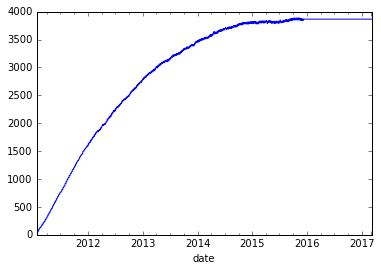

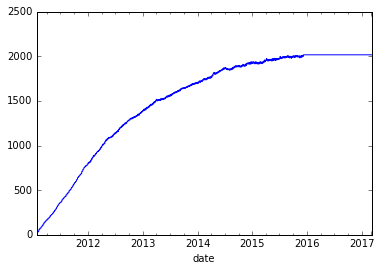

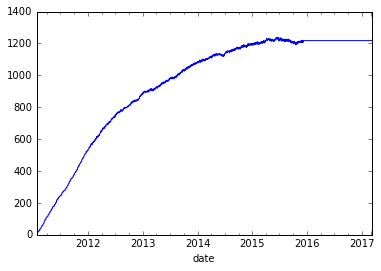

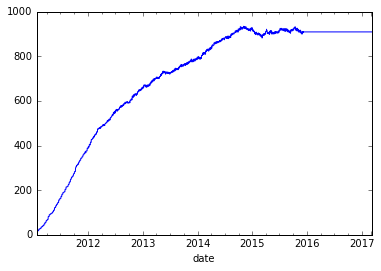

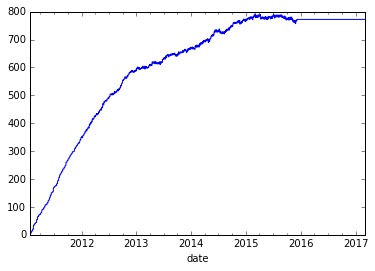

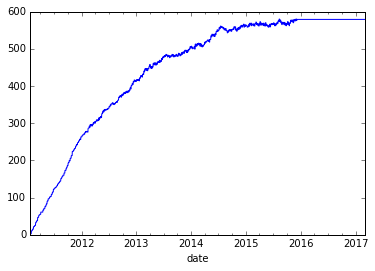

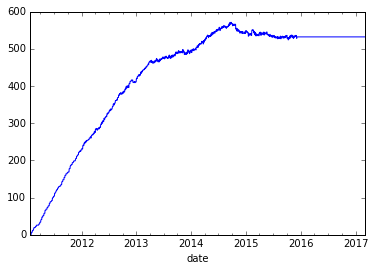

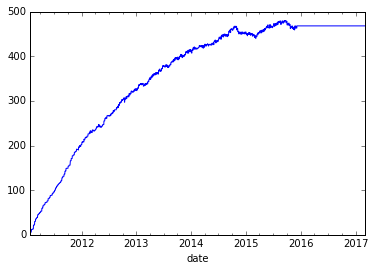

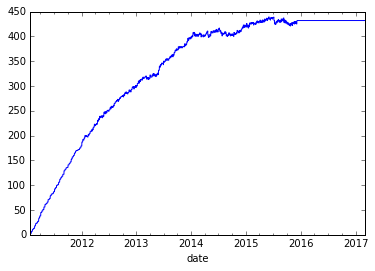

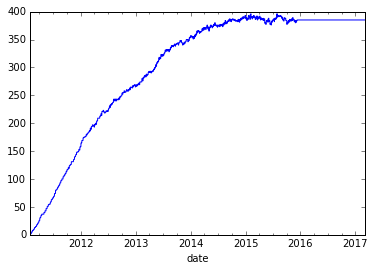

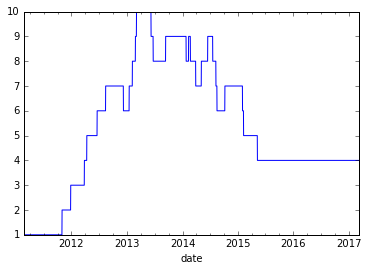

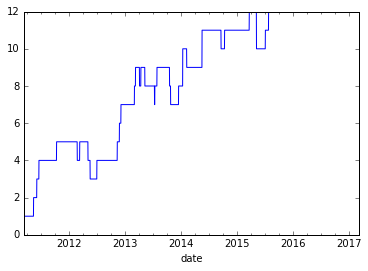

In [74]:
for i, group in days_to_quit.groupby('company_id'):
    plt.figure()
    group_agg = group.groupby('date').size()
    group_agg.plot(x='date', y='# of employees')

## Predicting